# Evaluating Algorithmic Strategy Performance

In this activity, you will be utilizing the performance metrics you've learned in order to analyze the benefits and tradeoffs of various algorithmic strategy investments.

## Instructions

#### Read in the Data
* Using the Jupyter notebook included in the unsolved folder, import the [data on daily returns to various algorithmic strategies.](../Resources/algo_returns.csv)

* This starter code reads in the following datasets:
  * `option_algos.csv`: Daily returns to an algorithmic option strategy on three stocks.
  * `option_trades.csv`: The number of trades each day for the three option strategies.
  * `equity_algos.csv`: Daily returns to an algorithmic equity strategy on three stocks.
  * `equity_trades.csv`: The number of trades each day for the three equity strategies.

#### Plotting Performance

* Plot non-compounded returns (`cumsum`) to the three option strategies.

* Plot compounded returns (1+`cumprod`) to the three equity strategies.

#### Adding Transaction Costs

* Create a variable called `cost_per_trade`, setting it at 0.001 (0.10% per trade).

* Using the `equity_trades` DataFrame, calculate the daily trade costs for each equity in the `equity_trades` DataFrame.

* Create a new DataFrame called `equity_returns_after_cost`, which subtracts daily trade costs from the `equity_returns` DataFrame.

* Then, create a new variable called `cost_per_trade`, this time setting it at 0.005 (0.50% per trade). Similarly, create a `option_returns_after_cost` DataFrame, which takes the daily option returns, and subtracts out daily `cost_per_trade` for the options.

#### Plot Performance After Transaction Costs

* Using 1+`cumprod`, calculate and plot cumulative performance of the `equity_returns_after_cost`.

* Using `cumsum`, calculate the total performance of the option returns `option_returns_after_cost`.

#### Calculate Sharpe Ratios

* Using the returns **after transaction costs**, calculate the Sharpe Ratio for each strategy
  * Calculate the Sharpe Ratios for both equity and option strategies.

#### Calculate Weekly Returns

* Use groupby on the equity returns (after transaction costs) and calculate total (`sum`) weekly returns. Use `describe` to display the best and worst weeks for trading.

* Do the same groupby approach, this time looking at weekly option trading returns.

In [1]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path

# Setting these options will allow for reviewing more of the DataFrames
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 300)

## Read in the Data

In [2]:
# Read CSV file from the resources folder into a Pandas DataFrame
# Set the date as the DateTimeIndex
option_returns = pd.read_csv(
    Path("../Resources/option_algos.csv"),
    index_col = "date", 
    parse_dates = True, 
    infer_datetime_format = True
)
# Review the DataFrame
option_returns.head()

,ANTM,SPY,EWJ
date,,,
2014-01-02,-0.045557,0.027186,0.118055
2014-01-03,-0.009778,-0.023939,-0.082041
2014-01-06,-0.026384,-0.027252,0.047106
2014-01-07,0.003609,0.123126,-0.051264
2014-01-08,0.016776,-0.053629,-0.024076


In [3]:
# Read CSV file from the resources folder into a Pandas DataFrame
# Set the date as the DateTimeIndex
option_trades = pd.read_csv(
    Path("../Resources/option_trades.csv"),
    index_col = "date", 
    parse_dates = True, 
    infer_datetime_format = True
)

# Review the DataFrame
option_trades.head()

,ANTM,SPY,EWJ
date,,,
2014-01-02,0.0,0.0,0.0
2014-01-03,0.0,0.0,0.0
2014-01-06,0.0,0.0,0.0
2014-01-07,0.0,0.0,0.0
2014-01-08,0.0,2.0,0.0


In [4]:
# Read CSV file from the resources folder into a Pandas DataFrame
# Set the date as the DateTimeIndex
equity_returns = pd.read_csv(
    Path("../Resources/equity_algos.csv"),
    index_col = "date", 
    parse_dates = True, 
    infer_datetime_format = True
)

# Review the DataFrame
equity_returns.head()

,ANTM,SPY,EWJ
date,,,
2014-01-02,-0.011942,-0.005984,-0.011659
2014-01-03,0.004855,0.000461,0.000584
2014-01-06,0.008953,0.002594,0.002586
2014-01-07,-0.011833,-0.004394,-0.004182
2014-01-08,-0.008566,-0.000095,-0.002623


In [5]:
# Read CSV file from the resources folder into a Pandas DataFrame
# Set the date as the DateTimeIndex
equity_trades = pd.read_csv(
    Path("../Resources/equity_trades.csv"),
    index_col = "date", 
    parse_dates = True, 
    infer_datetime_format = True
)

# Review the DataFrame
equity_trades.head()

,ANTM,SPY,EWJ
date,,,
2014-01-02,1,1.0,1
2014-01-03,0,0.0,0
2014-01-06,0,0.0,0
2014-01-07,0,1.0,0
2014-01-08,1,0.0,1


### Plotting Performance

<AxesSubplot:xlabel='date'>

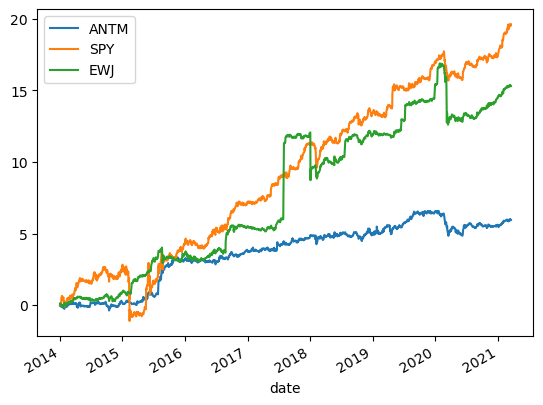

In [7]:
# Plot non-compounded returns (`cumsum`) to the three option strategies.
option_returns.cumsum().plot()

<AxesSubplot:xlabel='date'>

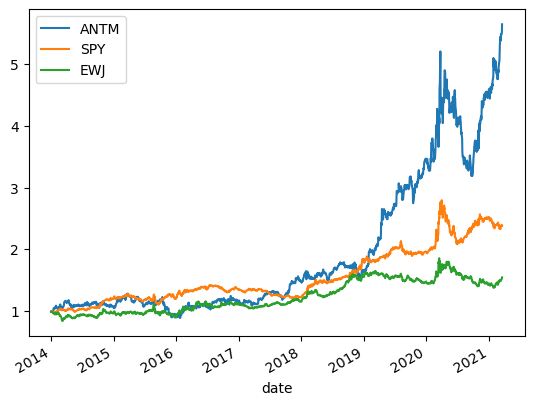

In [9]:
# Plot compounded returns (1+`cumprod`) to the three equity strategies.
(1+equity_returns).cumprod().plot()

### Adding Transaction Costs

In [ ]:
# Create a variable called `cost_per_trade`, setting it at 0.001 (0.10% per trade).
cost_per_trade = 0.001

# Using the `equity_trades` DataFrame, calculate the daily trade costs 
# for each equity in the `equity_algos` DataFrame.
daily_trade_costs_equity = equity_trades * cost_per_trade
daily_trade_costs_equity

,ANTM,SPY,EWJ
date,,,
2014-01-02,0.001,0.001,0.001
2014-01-03,0.000,0.000,0.000
2014-01-06,0.000,0.000,0.000
2014-01-07,0.000,0.001,0.000
2014-01-08,0.001,0.000,0.001
...,...,...,...
2021-03-12,0.000,0.000,0.000
2021-03-15,0.000,0.000,0.000
2021-03-16,0.000,0.000,0.000


In [12]:
# Create a new DataFrame called `equity_returns_after_cost`
# This should subtract daily trade costs from daily `equity_algos` returns.
equity_returns_after_cost = equity_returns - daily_trade_costs_equity
equity_returns_after_cost.head()

,ANTM,SPY,EWJ
date,,,
2014-01-02,-0.012942,-0.006984,-0.012659
2014-01-03,0.004855,0.000461,0.000584
2014-01-06,0.008953,0.002594,0.002586
2014-01-07,-0.011833,-0.005394,-0.004182
2014-01-08,-0.009566,-0.000095,-0.003623


In [13]:
# Create a new variable called cost_per_trade, this time setting it at 0.005 (0.50% per trade)
cost_per_trade = 0.005
# Calculate daily trade costs for options
daily_trade_costs_options = option_returns * cost_per_trade
daily_trade_costs_options.tail(6)

,ANTM,SPY,EWJ
date,,,
2021-03-11,0.000053,0.000311,0.000346
2021-03-12,-0.000107,-0.000072,-0.000043
2021-03-15,0.000025,-0.000180,-0.000112
2021-03-16,-0.000148,-0.000293,-0.000211
2021-03-17,-0.000164,0.000172,0.000029
2021-03-18,0.000112,0.000355,-0.000108


In [14]:
# Create a option_returns_after_cost DataFrame that calculates after cost option returns
option_returns_after_cost = option_returns - daily_trade_costs_options
option_returns_after_cost.head()

,ANTM,SPY,EWJ
date,,,
2014-01-02,-0.045330,0.027050,0.117465
2014-01-03,-0.009729,-0.023820,-0.081631
2014-01-06,-0.026252,-0.027115,0.046871
2014-01-07,0.003591,0.122511,-0.051008
2014-01-08,0.016692,-0.053361,-0.023956


### Plot Performance After Transaction Costs

<AxesSubplot:xlabel='date'>

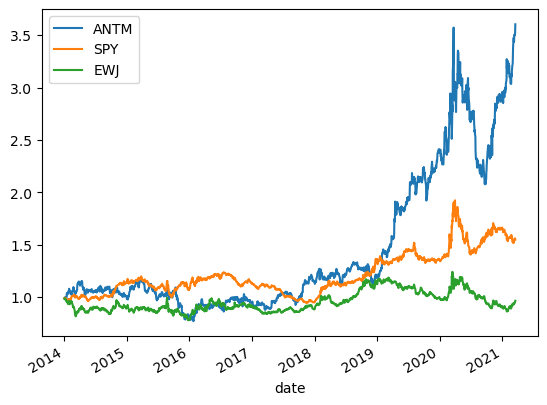

In [16]:
# Plot cumulative performance of after costs equity returns
(1+equity_returns_after_cost).cumprod().plot()

<AxesSubplot:xlabel='date'>

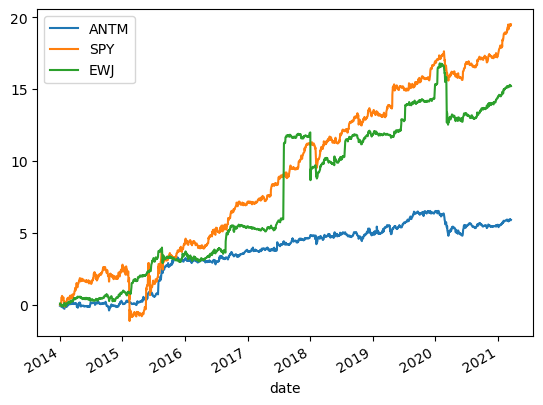

In [18]:
# Plot total performance of the option returns
option_returns_after_cost.cumsum().plot()

### Calculate Sharpe Ratios

Using the returns **after transaction costs**, calculate the Sharpe Ratio for each strategy.

Calculate the Sharpes for both equity and option strategies. 

In [14]:
# Using the returns after transaction costs, calculate the Sharpe Ratio for each equity strategy
# YOUR CODE HERE!

ANTM    0.802410
SPY     0.487163
EWJ     0.052008
dtype: float64

In [15]:
# Using the returns after transaction costs, calculate the Sharpe Ratio for each option strategy
# YOUR CODE HERE!

ANTM    0.686211
SPY     1.146813
EWJ     0.715246
dtype: float64

### Calculate Weekly Returns

In [19]:
equity_returns

,ANTM,SPY,EWJ
date,,,
2014-01-02,-0.011942,-0.005984,-0.011659
2014-01-03,0.004855,0.000461,0.000584
2014-01-06,0.008953,0.002594,0.002586
2014-01-07,-0.011833,-0.004394,-0.004182
2014-01-08,-0.008566,-0.000095,-0.002623
...,...,...,...
2021-03-12,0.017204,-0.003326,0.009141
2021-03-15,-0.001070,0.004336,0.005297
2021-03-16,0.002722,0.005712,0.007787


In [25]:
# Use `groupby` to calculate total weekly equity returns
weekly_returns = equity_returns.groupby(
        by=[
            equity_returns.index.year,
            equity_returns.index.week
        ]
    ).sum()
weekly_returns.head(5)

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


ANTM       SPY       EWJ
date date                              
2014 1    -0.023079 -0.003685 -0.011152
     2    -0.008608 -0.000933 -0.013878
     3     0.060125 -0.019777 -0.015910
     4     0.014654  0.001552 -0.003431
     5     0.006061  0.000514 -0.013589

In [26]:
# Use `describe` to calculate the best and worst weeks for equity returns.
equity_returns.describe()

,ANTM,SPY,EWJ
count,1815.000000,1815.000000,1815.000000
mean,0.001089,0.000519,0.000289
std,0.016502,0.009035,0.010004
min,-0.117169,-0.068987,-0.067631
25%,-0.007126,-0.003343,-0.004672
50%,0.000729,0.000405,0.000040
75%,0.008763,0.004350,0.005135
max,0.137672,0.076981,0.100899


In [30]:
# Calculate weekly returns for the option strategies using groupby
weekly_returns = option_returns.groupby(
    by = [
        option_returns.index.year,
        option_returns.index.week
    ]
).sum()

weekly_returns.head(5)

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


ANTM       SPY       EWJ
date date                              
2014 1    -0.216612  0.257953  0.174084
     2    -0.017401  0.535180 -0.079912
     3    -0.056194 -0.039233  0.038161
     4    -0.091149 -0.221156  0.070977
     5     0.173882 -0.163637  0.042779

In [31]:
# Use `describe` to calculate best (max) and worst (min) case option returns
option_returns.describe()

,ANTM,SPY,EWJ
count,1812.000000,1812.000000,1812.000000
mean,0.003286,0.010829,0.008446
std,0.063871,0.140380,0.171988
min,-0.516970,-2.067955,-3.335986
25%,-0.023331,-0.040743,-0.025966
50%,0.001888,0.006663,0.003301
75%,0.028311,0.063280,0.037033
max,0.444892,1.111154,4.471597
